In [1]:
from transformers import pipeline
import torch
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random


In [17]:
# Initialize the text generation pipeline
generator = pipeline("text-generation", model="gpt2", device=-1)  # Use device=0 for GPU, or device=-1 for CPU
model = AutoModelForCausalLM.from_pretrained("gpt2", output_attentions=True, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained("gpt2") 

tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

Device set to use cpu
C:\Users\lucaf\anaconda3\ancaonda_3\Lib\site-packages\transformers\generation\configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(
C:\Users\lucaf\anaconda3\ancaonda_3\Lib\site-packages\transformers\generation\configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


**PLOT EMBEDDING SPACE FOR A SPECIFIC BATCH**

In [3]:
"""
#ENTROPY 
#projection of that cevotrs

for i in range(len(hidden_states)):
    print(i)
    last_hidden_layer = hidden_states[i]
    embeddings = last_hidden_layer[1, -1, :]  # Shape: (batch_size, embedding_dim)  I'M TAKING FIRST TOKEN 
    print(embeddings.shape)
    plt.plot(embeddings.numpy().flatten())
    plt.title("1D Visualization of Embedding")
    plt.show()"""

'\n#ENTROPY \n#projection of that cevotrs\n\nfor i in range(len(hidden_states)):\n    print(i)\n    last_hidden_layer = hidden_states[i]\n    embeddings = last_hidden_layer[1, -1, :]  # Shape: (batch_size, embedding_dim)  I\'M TAKING FIRST TOKEN \n    print(embeddings.shape)\n    plt.plot(embeddings.numpy().flatten())\n    plt.title("1D Visualization of Embedding")\n    plt.show()'

**PLOT ALL BATCH TOGHEDER**

In [4]:
#FA SCHIFO, però ero curioso di vedere se ci fossero "correlazioni" in comune.
# secondo voi si può dire che nell'ultimo layer i picchi rappresentano le caratteristiche in comune (in questo caso-> frutta)?

"""
for i in range(len(hidden_states)):
    print(f"Layer {i}")
    last_hidden_layer = hidden_states[i]  # Shape: (batch_size, sequence_length, hidden_size)
    
  
    for batch_idx in range(last_hidden_layer.shape[0]):  # batch dimension
        embeddings = last_hidden_layer[batch_idx, -1, :]  # Take the last token's embedding for each batch
        print(f"Batch {batch_idx} Embedding Shape: {embeddings.shape}")
        plt.plot(embeddings.numpy().flatten(), label=f"{text[batch_idx]}", alpha=0.5)
    

    plt.title(f"1D Visualization of Embedding for Layer {i}")
  #  plt.legend() 
    plt.show()"""

'\nfor i in range(len(hidden_states)):\n    print(f"Layer {i}")\n    last_hidden_layer = hidden_states[i]  # Shape: (batch_size, sequence_length, hidden_size)\n    \n  \n    for batch_idx in range(last_hidden_layer.shape[0]):  # batch dimension\n        embeddings = last_hidden_layer[batch_idx, -1, :]  # Take the last token\'s embedding for each batch\n        print(f"Batch {batch_idx} Embedding Shape: {embeddings.shape}")\n        plt.plot(embeddings.numpy().flatten(), label=f"{text[batch_idx]}", alpha=0.5)\n    \n\n    plt.title(f"1D Visualization of Embedding for Layer {i}")\n  #  plt.legend() \n    plt.show()'

In [5]:

"""The value of each dimension indicates how strongly the input data correlates with that feature.
For example:

One dimension might encode sentiment (positive/negative).
Another dimension might encode part-of-speech information (noun, verb).
Yet another might encode syntactic relationships (subject, object).
However, these features are not human-interpretable, as they are learned automatically during training."""

"""Positive Values: Strong activation or alignment with the feature.
Negative Values: Negative correlation or opposite alignment with the feature.
Values Near Zero: Weak or no correlation with the feature."""

'Positive Values: Strong activation or alignment with the feature.\nNegative Values: Negative correlation or opposite alignment with the feature.\nValues Near Zero: Weak or no correlation with the feature.'

### Short Prompts (1–5 words)
Good for analyzing minimal context and word-level embeddings.

- "Sunset"

- "The quick fox"

- "Hello world"

- "Once upon a"

- "Artificial intelligence"

### Medium Prompts (6–15 words)
Useful for observing basic syntactic and semantic patterns.

- "The cat sat on the warm windowsill and purred quietly."

- "He opened the door to find a mysterious package waiting."

- "Deep learning has revolutionized computer vision and natural language processing."

- "A sudden noise startled her while she was reading a book."

- "The recipe called for eggs, flour, sugar, and a pinch of salt."

### Long Prompts (16–50 words)
Better for studying how GPT-2 processes extended context or narrative flow.

- "The scientist carefully adjusted the settings on the control panel, knowing that one wrong move could trigger a catastrophic failure that would destroy years of research and potentially endanger lives."

- "In a future where machines have gained consciousness, a lone programmer works tirelessly to insert a backdoor into the system, hoping to reclaim control of a world slipping away."

- "During the final debate, the candidate made a passionate appeal to unity, addressing both critics and supporters, promising transparency, economic reform, and a renewed focus on international cooperation."

### Very Long Prompt (50+ words)
Use this to test GPT-2’s capacity limits, token truncation, and how it handles deeper coherence.

- "As the storm raged outside, Maria sat by the fireplace, recalling the last letter her brother had sent before disappearing in the mountains. It spoke of a hidden temple, an ancient curse, and a secret he had vowed to protect at all costs. Her hands trembled as she read it again."

(Prompt with dialogue and descriptive elements)
- "“I never asked for this,” he whispered, staring at the broken mask in his hands. Around him, the ruins of the facility burned, casting eerie shadows on the bloodstained walls. Footsteps echoed in the corridor—someone was still alive. And they were looking for him."

In [6]:
prompts = {
    "short": [
        "Sunset",
        "The quick fox",
        "Hello world",
        "Once upon a",
        "Artificial intelligence"
    ],
    "medium": [
        "The cat sat on the warm windowsill and purred quietly.",
        "He opened the door to find a mysterious package waiting.",
        "Deep learning has revolutionized computer vision and natural language processing.",
        "A sudden noise startled her while she was reading a book.",
        "The recipe called for eggs, flour, sugar, and a pinch of salt."
    ],
    "long": [
        "The scientist carefully adjusted the settings on the control panel, knowing that one wrong move could trigger a catastrophic failure that would destroy years of research and potentially endanger lives.",
        "In a future where machines have gained consciousness, a lone programmer works tirelessly to insert a backdoor into the system, hoping to reclaim control of a world slipping away.",
        "During the final debate, the candidate made a passionate appeal to unity, addressing both critics and supporters, promising transparency, economic reform, and a renewed focus on international cooperation."
    ],
    "very_long": [
        "As the storm raged outside, Maria sat by the fireplace, recalling the last letter her brother had sent before disappearing in the mountains. It spoke of a hidden temple, an ancient curse, and a secret he had vowed to protect at all costs. Her hands trembled as she read it again.",
        "“I never asked for this,” he whispered, staring at the broken mask in his hands. Around him, the ruins of the facility burned, casting eerie shadows on the bloodstained walls. Footsteps echoed in the corridor—someone was still alive. And they were looking for him."
    ],
    "closed": [
        "The capital of France is", 
        "Water freezes at 0 degrees",
        "The currency used in Japan is the",
        "The chemical symbol for gold is",
        "The author of Romeo and Juliet is",
        "The largest planet in our solar system is",
        "The primary language spoken in Brazil is",
        "The square root of 64 is",
        "The opposite of hot is",
        "The Great Wall is located in"
    ]
}

# TO USE:
# for category, prompt_list in prompts.items():
#    for prompt in prompt_list:
#        inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
#        outputs = model(**inputs)
#        # your embedding analysis here...


In [7]:


def token(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"]
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    print("🧾 Tokens:")
    for idx, tok in enumerate(tokens):
        print(f"{idx:2}: {tok}")

    gen_output = model.generate(
        input_ids,
        max_new_tokens=15,
        temperature=1,
        do_sample=False,
        return_dict_in_generate=True,
        output_scores=True)

    gen_ids = gen_output.sequences[0]
    generated_token_ids = gen_ids[input_ids.shape[1]:]
    generated_tokens = tokenizer.convert_ids_to_tokens(generated_token_ids)
    generated_text = tokenizer.decode(generated_token_ids)

    print("\n📝 Generated Text:")
    print(generated_text)

    return inputs, generated_token_ids, tokens, generated_tokens, generated_text



prompt = "What is the color of Italian Flag: RED, WHITE and"


inputs, generated_token_ids, tokens, generated_tokens, generated_text = token(prompt)



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


🧾 Tokens:
 0: What
 1: Ġis
 2: Ġthe
 3: Ġcolor
 4: Ġof
 5: ĠItalian
 6: ĠFlag
 7: :
 8: ĠRED
 9: ,
10: ĠWHITE
11: Ġand

📝 Generated Text:
 BLUE?

The color of Italian Flag is red, white and


In [8]:

def attention(inputs):
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    logits = outputs.logits
    attentions = outputs.attentions
    hidden_state = outputs.hidden_states
    
    return (logits, attentions, hidden_state )


logits_prompt, attentions_prompt, hidden_state_prompt = attention(inputs)

generated_inputs = {"input_ids": generated_token_ids.unsqueeze(0)}  # Add batch dimension
logits_generated, attentions_generated, hidden_state_generated = attention(generated_inputs)


In [9]:
#SEE THE MOST PROBABLE NEXT TOKEN FOR EACH TOKEN

def top_k(logits, attentions, tokens):
    top_k = 5
    vocab_size = logits.shape[-1]

    print("\nTop-5 Predictions at Each Step:")
    for step in range(logits.shape[1]):
        probs = torch.softmax(logits[0, step], dim=-1)
        top_probs, top_indices = torch.topk(probs, k=top_k)
        top_tokens = tokenizer.convert_ids_to_tokens(top_indices.tolist())
        token_str = tokens[step] if step < len(tokens) else "<PAD/UNK>"
        print(f"\nStep {step:2} | Token: {token_str}")
        for rank in range(top_k):
            print(f"  {rank+1:2}: {top_tokens[rank]:>12} ({top_probs[rank].item():.4f})")


top_k(logits_prompt, attentions_prompt,  tokens )
top_k(logits_generated, attentions_generated, generated_tokens )


Top-5 Predictions at Each Step:

Step  0 | Token: What
   1:          Ġis (0.0409)
   2:         Ġthe (0.0294)
   3:           's (0.0232)
   4:            , (0.0211)
   5:          Ġto (0.0198)

Step  1 | Token: Ġis
   1:         Ġthe (0.1791)
   2:        Ġyour (0.0818)
   3:           Ġa (0.0650)
   4:          Ġit (0.0649)
   5:        Ġthis (0.0265)

Step  2 | Token: Ġthe
   1:        Ġbest (0.0451)
   2:  Ġdifference (0.0418)
   3:        Ġmost (0.0261)
   4:     Ġpurpose (0.0156)
   5:     Ġmeaning (0.0126)

Step  3 | Token: Ġcolor
   1:          Ġof (0.6064)
   2:            ? (0.0505)
   3:         Ġyou (0.0146)
   4:         Ġand (0.0140)
   5:      Ġscheme (0.0107)

Step  4 | Token: Ġof
   1:         Ġthe (0.3708)
   2:        Ġyour (0.1186)
   3:           Ġa (0.0514)
   4:        Ġthis (0.0343)
   5:          Ġmy (0.0210)

Step  5 | Token: ĠItalian
   1:        Ġfood (0.0296)
   2:        Ġwine (0.0274)
   3:     Ġsausage (0.0250)
   4:      Ġcheese (0.0227)
   5:   Ġchoc

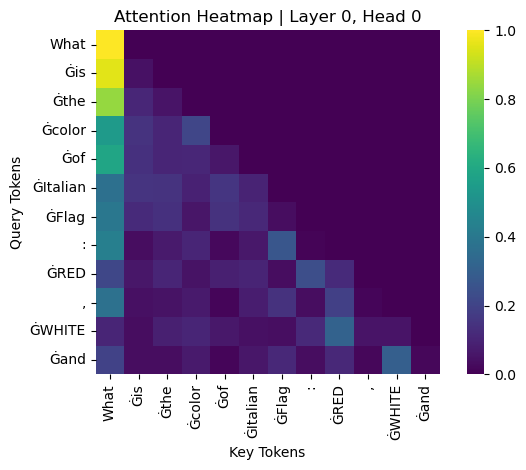

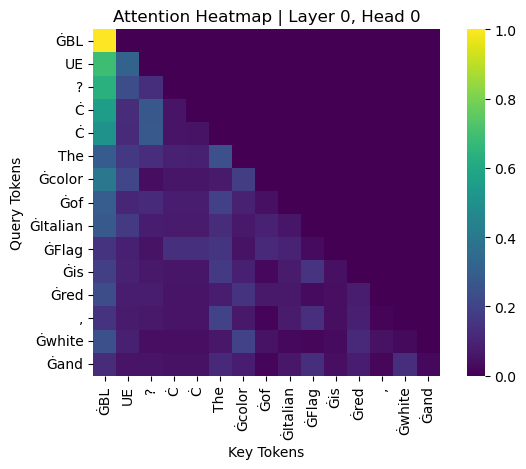

In [10]:
def plot_attention_matrix(att_matrix, tokens, layer=0, head=0):
    # Extract the attention matrix for the specified layer and head
    attn = att_matrix[layer][0, head].detach().numpy()

    # Filter out <PAD> and <UNK> tokens and their corresponding rows/columns
    valid_indices = [i for i, token in enumerate(tokens) if token not in ("<PAD>", "<UNK>")]
    filtered_attn = attn[np.ix_(valid_indices, valid_indices)]
    filtered_tokens = [tokens[i] for i in valid_indices]

    # Plot the attention heatmap
    sns.heatmap(filtered_attn, xticklabels=filtered_tokens, yticklabels=filtered_tokens, cmap="viridis", square=True, cbar=True)
    plt.title(f"Attention Heatmap | Layer {layer}, Head {head}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example: Layer 0, Head 0
plot_attention_matrix(attentions_prompt, tokens, layer=0, head=0)
plot_attention_matrix(attentions_generated, generated_tokens, layer=0, head=0)

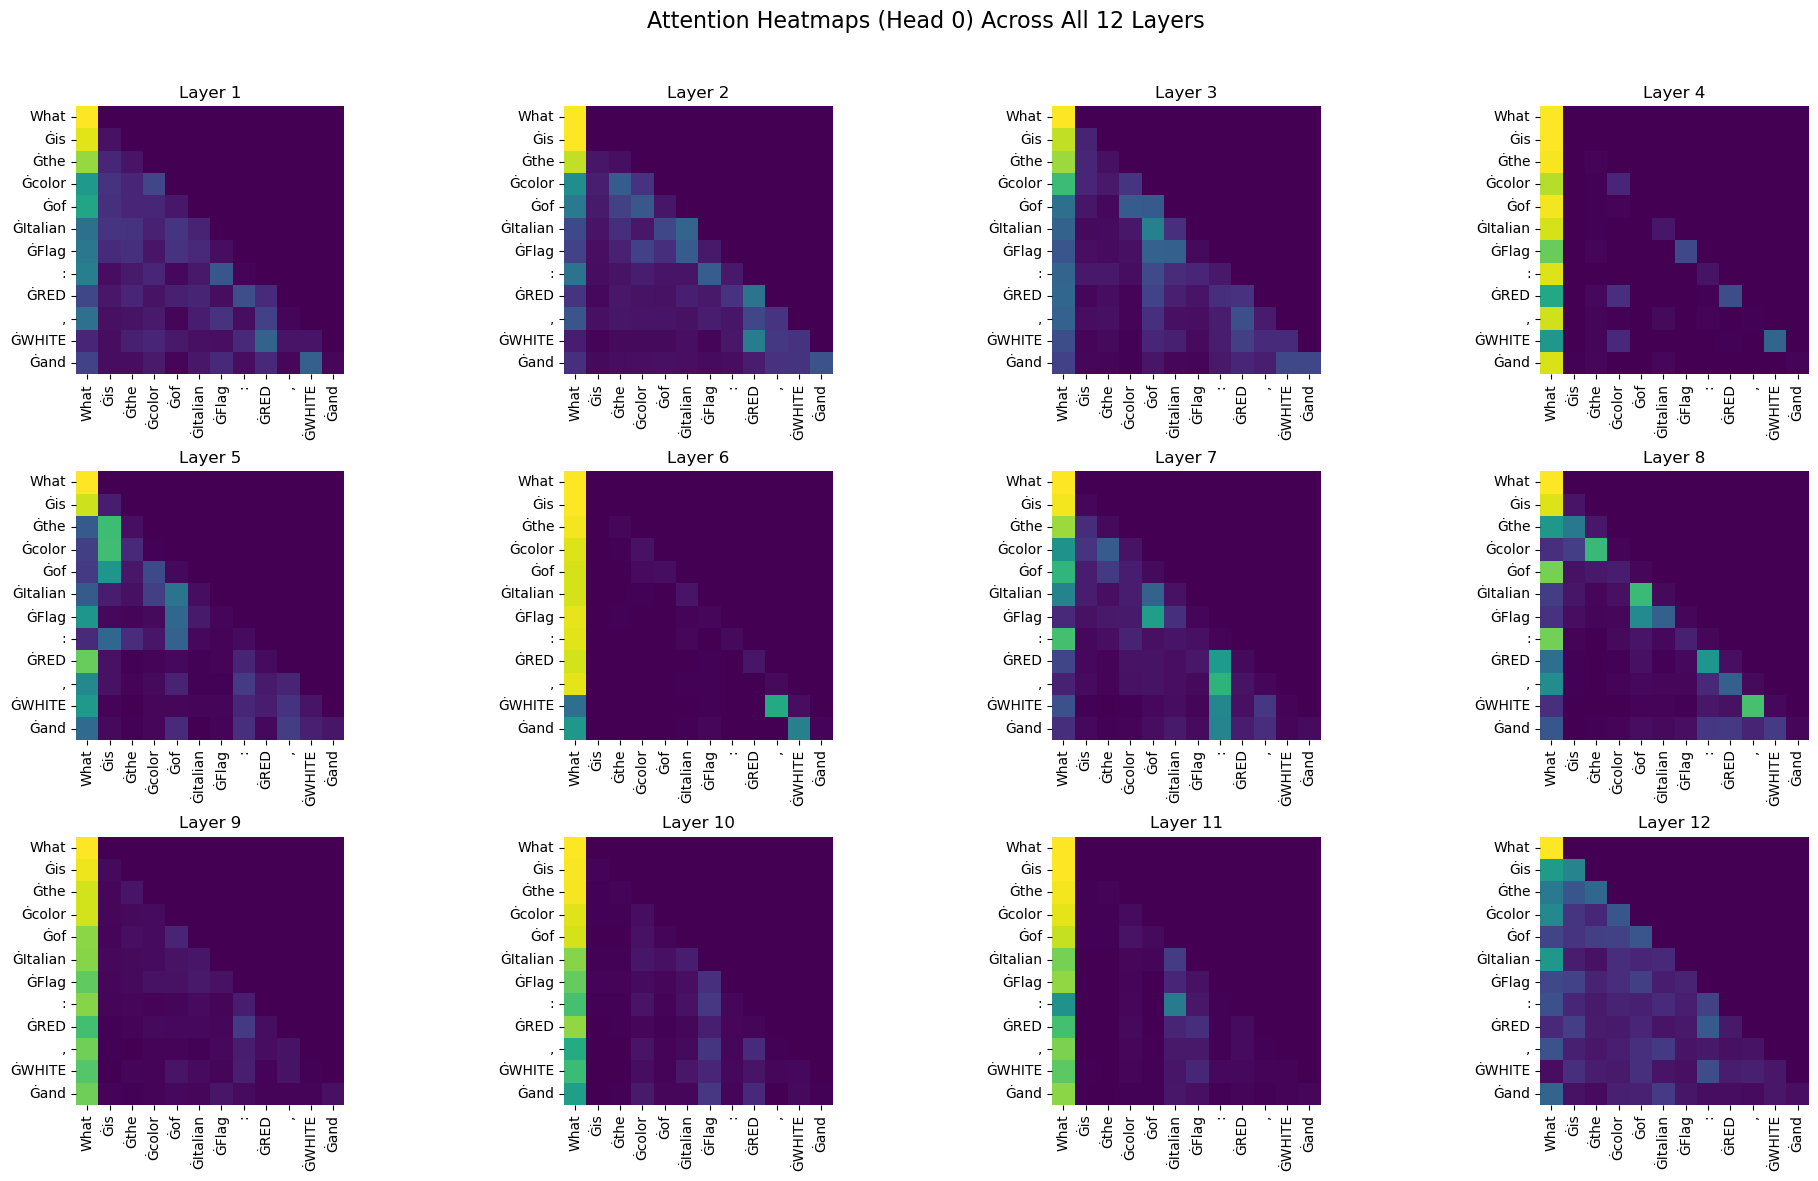

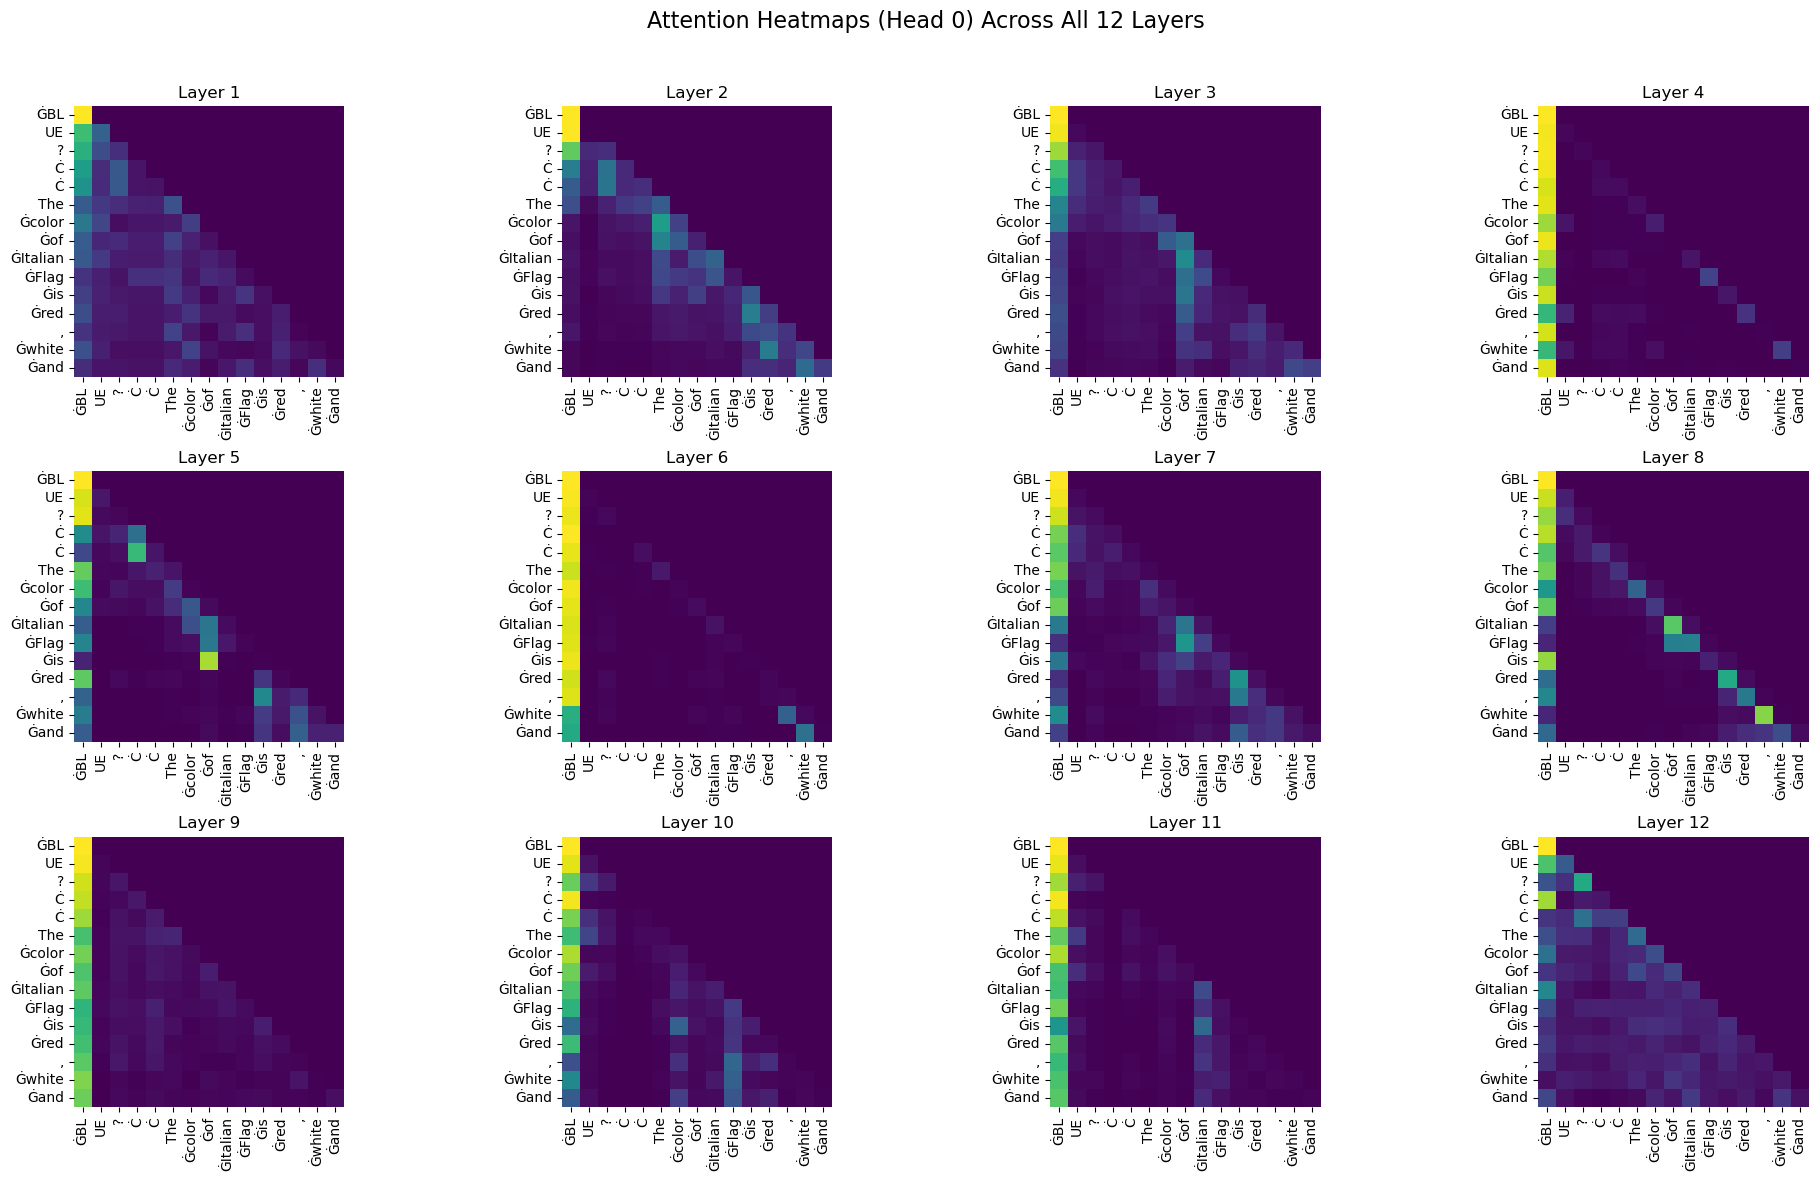

In [11]:
#SEE MOST PROBABLE NEXT TOKEN AND ATTENTION AT EACH LAYER
model.eval()
"""
# Input text
prompt = " boiling temperature of water?"
#"The author of Romeo and Juliet is William"
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"]
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])


# Forward pass with hidden states
with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions  # List of tensors: [layer][batch, head, seq_len, seq_len]
"""
def PCA(hidden_states):
    n_layers = len(hidden_states)

    # Language modeling head
    lm_head = model.lm_head  # Linear layer from hidden dim -> vocab size
    top_k = 5  # Change as needed
    token_position = -1  # Last token in prompt

    print(f"Prompt: {prompt}\n")

    for i in range(1, n_layers):  # skip embeddings (index 0)
        hidden = hidden_states[i]  # shape: [1, seq_len, hidden_dim]
        last_token_vec = hidden[0, token_position, :]  # shape: [hidden_dim]
        logits = lm_head(last_token_vec)  # shape: [vocab_size]
        probs = torch.softmax(logits, dim=-1)
        top_probs, top_ids = torch.topk(probs, top_k)
        top_tokens = tokenizer.convert_ids_to_tokens(top_ids)

        print(f"Layer {i:2d}:")
        for j in range(top_k):
            print(f"  {j+1:2d}: {top_tokens[j]:>10} ({top_probs[j].item():.4f})")


def plot_attention_layers(attentions, tokens, head_idx=0):
    num_layers = len(attentions)
    seq_len = len(tokens)

    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    fig.suptitle(f"Attention Heatmaps (Head {head_idx}) Across All 12 Layers", fontsize=16)

    for i in range(num_layers):
        ax = axes[i // 4, i % 4]
        attn = attentions[i][0, head_idx, :, :].detach().numpy()
        sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="viridis", ax=ax, square=True, cbar=False)
        ax.set_title(f"Layer {i+1}")
        ax.tick_params(axis='x', rotation=90)
        ax.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_attention_layers(attentions_prompt, tokens, head_idx=0)
plot_attention_layers(attentions_generated, generated_tokens, head_idx=0)


To analyze the dynamics of hidden states across layers, you're essentially exploring how the internal token representations evolve at each layer of the transformer. Here are several ways you can analyze and visualize these dynamics effectively:

1. Cosine Similarity Between Layers

Measure how the hidden representation of a specific token (e.g., the last token "William") changes across layers.
Cosine similarity is a measure of similarity between two vectors based on the angle between them—not their length. It's commonly used in natural language processing (NLP) to compare how "similar" two token embeddings or hidden states are.

Formula:
For two vectors A and B, the cosine similarity is:

cosine_similarity(𝐴,𝐵)=𝐴⋅𝐵/(∥𝐴∥∥𝐵∥)

1.0 → Vectors point in the same direction → Very similar

0.0 → Vectors are orthogonal (90° apart) → No similarity

–1.0 → Vectors point in opposite directions → Completely dissimilar
​

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

def plot_cosine(hidden_states, token, tokens, norm_plot=False):
    """
    Plots cosine similarity and L2 norm of a token's hidden state across model layers.

    Parameters:
        hidden_states (List[Tensor]): List of hidden states per layer, shape [1, seq_len, hidden_dim]
        token (str): The token to track (e.g., 'Ġplaying')
        tokens (List[str]): List of token strings from the tokenizer
    """
    # Find all positions where the token appears
    token_positions = [i for i, tok in enumerate(tokens) if tok == token]
    
    if not token_positions:
        print(f"Token '{token}' not found in sequence.")
        return

    for pos in token_positions:
        n_layers = len(hidden_states)

        # Extract hidden vectors across layers for this token position
        vectors = [hidden_states[i][0, pos].detach().cpu().numpy() for i in range(n_layers)]

        # Compute cosine similarities between consecutive layers
        cos_sims = [cosine_similarity([vectors[i]], [vectors[i + 1]])[0][0] for i in range(n_layers - 1)]
        cos_origine = [cosine_similarity([vectors[0]], [vectors[i + 1]])[0][0] for i in range(n_layers - 1)]

        # Plot cosine similarity
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, n_layers), cos_sims, marker='o',color="blue", label='Consecutive Layers')
        plt.plot(range(1, n_layers), cos_origine, marker='o', color="orange", label='Layer 0 vs Others')
        plt.title(f'Cosine Similarity of Token "{token}" (pos {pos}) Between Layers')
        plt.xlabel('Layer')
        plt.ylabel('Cosine Similarity')
        plt.legend()
        plt.grid(True)

        for i, sim in enumerate(cos_sims, 1):
            plt.text(i, sim + 0.01, f"{sim:.2f}", ha='center')

        plt.show()

        if norm_plot:
        # Compute and plot L2 norms
            norms = [np.linalg.norm(vec) for vec in vectors]

            plt.figure(figsize=(10, 5))
            plt.plot(range(n_layers), norms, marker='o')
            plt.title(f'L2 Norm of Token "{token}" (pos {pos}) Across Layers')
            plt.xlabel('Layer')
            plt.ylabel('L2 Norm')
            plt.grid(True)

            for i, norm in enumerate(norms):
                plt.text(i, norm + (max(norms) * 0.02), f"{norm:.2f}", ha='center', fontsize=10)

            plt.show()

        #IF THE TOKEN APPEAR MORE TIME IS WILL SHOW ONLY THE FIRST
        break

    return vectors

2. Hidden State Norms

See how the magnitude (L2 norm) of token vectors changes with depth. High/low norms can indicate activation saturation or sparsity.

3. Dimensionality Projection (e.g., PCA or t-SNE)

You can visualize the full trajectory of a token in reduced space.


4. Compare Multiple Tokens


d what characteristics influnce more the choise of token. It gives in output also shich tokens are most activated by those top (and bottom) dimensions. And via the associated tokens, what kinds of linguistic or semantic phenomena those dimensions are capturing. It also tell witch hidden state dimensions most strongly influence this component.

These dimension  can be something real ( like: Syntax (e.g., punctuation, word order), Frequency (e.g., Ġthe, ,, -), Semantics (e.g., Shakespeare, wrote, play)) or something abstract like features or patterns that are not directly interpretable by humans. They were learned by the model during pretraining, and while we can often find correlations to human-interpretable concepts.


NB each dimension has a difefrent meaning for each token.

If certain dimensions in the embeddings encode general information (grammatical rules), these dimensions will dominate the PCA results for all prompts.


In [13]:
from sklearn.decomposition import PCA

def top_dimensions(loadings, X_static, vocab, pca, M):
    """
    For each principal component, find the top-M embedding dims by absolute weight,
    then print the tokens that score highest and lowest on each of those dims.
    """
    dimension_top = []
    tokens_top= []
    tokens_bot= []
    
    K, D = loadings.shape # K: number of PCs, D: number of original dimensions.
    for i in range(K):
        ev = pca.explained_variance_ratio_[i]
        print(f"\n=== PC{i+1} (explained var ratio: {ev:.3f}) ===")
        abs_w = np.abs(loadings[i])
        top_dims = np.argsort(abs_w)[-M:][::-1]
        dimension_top.extend(top_dims)  # Collect all top dimensions from all PCs
        for dim in top_dims:
            wt = loadings[i, dim]
            scores = X_static[:, dim]
            top_tokens = [vocab[j] for j in np.argsort(scores)[-5:]]
            tokens_top.append(top_tokens)
            
            bottom_tokens = [vocab[j] for j in np.argsort(scores)[:5]]
            tokens_bot.append(bottom_tokens)
            
            print(f"Dim {dim:4d} (wt {wt:+.3f}): top→ {top_tokens}, bottom→ {bottom_tokens}")
            
    return dimension_top, tokens_bot[0], tokens_bot[M], tokens_top[0], tokens_top[M] 

# 4. Define trajectory + PCA helper and plotting
def multiple_tokens(target_tokens, tokens, hidden_states, X_static, vocab, M, n_component, norm_plot):
    """
    Track trajectories of target tokens, apply PCA, and interpret principal components.
    """
    # Locate token positions
    idxs = [i for i, tok in enumerate(tokens) if any(sub in tok for sub in target_tokens)]
    tracked = [tokens[i] for i in idxs]
 #   print("Tracking tokens at positions:", list(zip(tracked, idxs)))


    plot_cosine(hidden_states, target_tokens, tokens, norm_plot)
    # Collect trajectories
    trajs = []
    for layer in hidden_states:
        vecs = layer[0, idxs].detach().cpu().numpy()
        trajs.append(vecs)
    all_vecs = np.vstack(trajs)

    # Fit PCA

    pca = PCA(n_components=n_component)
    reduced = pca.fit_transform(all_vecs)

    # Interpret PCs
    dimension_top = top_dimensions(pca.components_, X_static, vocab, pca, M=M)
    
    return dimension_top


# 5. Define dimension tracking for multiple dimensions
def dimension_tracking(dimension_indices, target_token, tokens, M):
    """
    Track the evolution of multiple dimensions for a single target token across layers.
    """
    # Find the index of the target token in the tokens list
    idxs = [i for i, tok in enumerate(tokens) if target_token in tok]
    if not idxs:
        print(f"Target token '{target_token}' not found in tokens.")
        return
    token_idx = idxs[0]  # Assume the first match is the one we want
    
    # Plot the evolution for each dimension index
    c=0
    for idx,dimension_index in enumerate(dimension_indices):
        if idx>=M:            
                values = [layer[0, token_idx, dimension_index].item() for layer in hidden_states]
                plt.plot(values,linestyle='dotted', label=f"Dim {dimension_index}")

        else: 
                values = [layer[0, token_idx, dimension_index].item() for layer in hidden_states]
                plt.plot(values, label=f"Dim {dimension_index}")

    plt.title(f"Evolution of dimensions for token '{target_token}' across layers, fill line -> PC1, dotted line->PC2")
    plt.xlabel("Layer")
    plt.ylabel("Value")
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.grid(True)
    plt.show()

In [19]:


def cosine(top_tokens, generated_hidden_state):
       
    ############ TOKENIZE TOP_TOKENS ###########
    token_embeddings = []
    
    for token in top_tokens:
        tokenized_token = tokenizer(token, return_tensors="pt", padding=True)
    
        with torch.no_grad():
            outputs = model(**tokenized_token)

        # Extract hidden states from the last layer
        hidden_state = outputs.hidden_states # Shape: (batch_size, sequence_length, hidden_size)
     
        layer_embeddings = [layer[0, 0, :].detach().cpu().numpy() for layer in hidden_state]
        
        # Store the layer-wise embeddings in the dictionary
        token_embeddings.append(layer_embeddings)

        plot_cosine(generated_hidden_state, token, top_tokens, norm_plot=False)
    ###########################################
    cosine_similarities = []

    # Compute cosine similarity for each layer and token
    for idx, embedding in enumerate(token_embeddings):
        
        token_cosine_sim = []
        for layer_idx, layer_embedding in enumerate(embedding):
            generated_layer = generated_hidden_state[layer_idx]
            
            # Compute cosine similarity between the two embeddings
            cos_sim = cosine_similarity([generated_layer[0][idx]], [layer_embedding])[0][0]
            token_cosine_sim.append(cos_sim)
        
        cosine_similarities.append(token_cosine_sim)
    
    # Plot all cosine similarities for each layer
    plt.figure(figsize=(10, 6))
    for idx, token_similarities in enumerate(cosine_similarities):
        plt.plot(token_similarities, label=f"Token {idx}: {top_tokens[idx]}")

    plt.title("Cosine Similarity Across Layers for Each Token")
    plt.xlabel("Layer Index")
    plt.ylabel("Cosine Similarity")
    plt.legend()
    plt.grid()
    plt.show()


    




******MAIN******

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 

The target token is: The 

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 



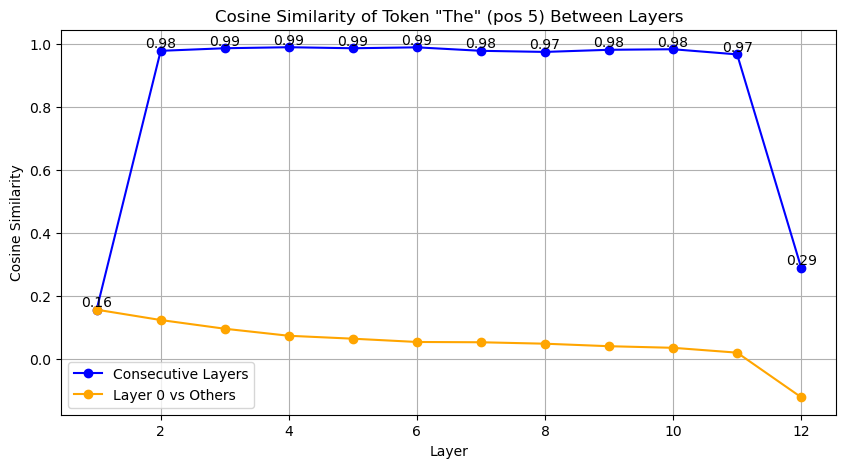


=== PC1 (explained var ratio: 0.431) ===
Dim  481 (wt +0.589): top→ ['-', ' a', ' and', ',', ' the'], bottom→ ['覚醒', 'cloneembedreportprint', '龍契士', '�', '�']
Dim  447 (wt +0.533): top→ [' a', ' and', '-', ',', ' the'], bottom→ ['���', ' guiActiveUn', 'cloneembedreportprint', '\x06', '\x1a']
Dim  373 (wt -0.469): top→ ['\x05', 'rawdownload', 'reportprint', '�', '\x7f'], bottom→ [' the', ',', ' and', '-', ' a']

=== PC2 (explained var ratio: 0.261) ===
Dim  496 (wt +0.832): top→ [' cryst', 'accompan', ' occas', ' misunder', 'ModLoader'], bottom→ ['��', '��士', 'ikuman', 'GoldMagikarp', '�']
Dim  430 (wt +0.310): top→ [' agre', ' Adin', ' Vaugh', ' Pengu', ' Citiz'], bottom→ ['conservancy', 'glomer', 'Buyable', 'VIDIA', 'accompan']
Dim   36 (wt +0.277): top→ ['��', '��', 'anamo', '��', 'aeper'], bottom→ ['ciating', 'Magikarp', 'velength', 'querque', 'ournal']


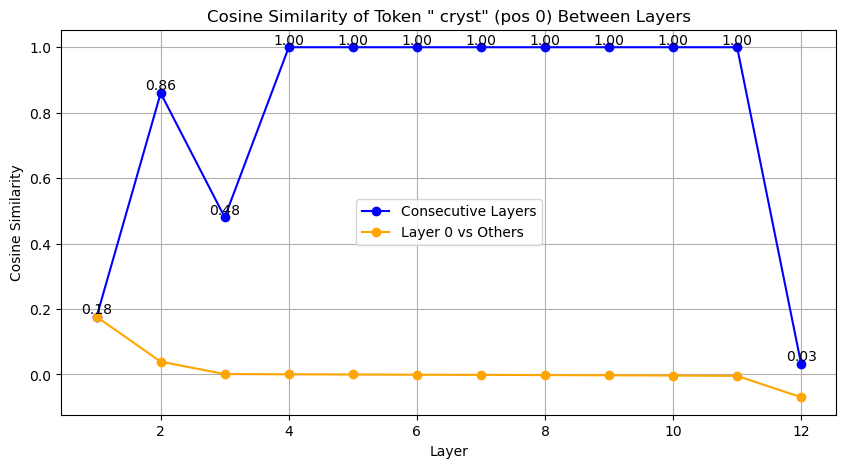

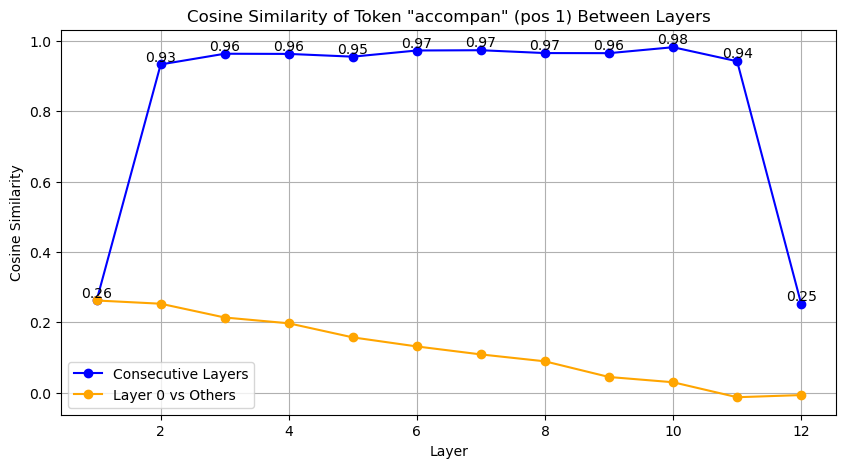

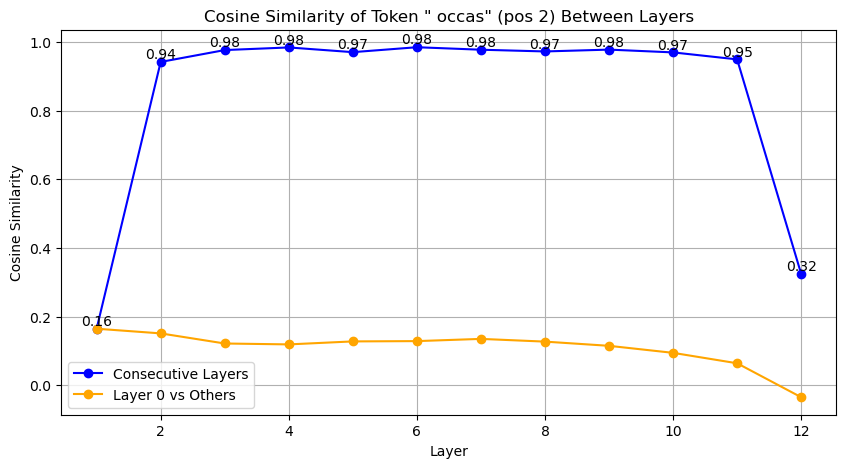

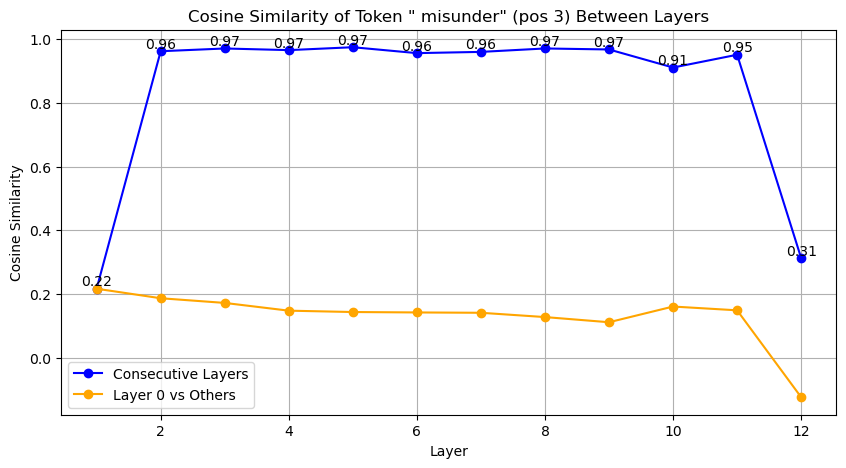

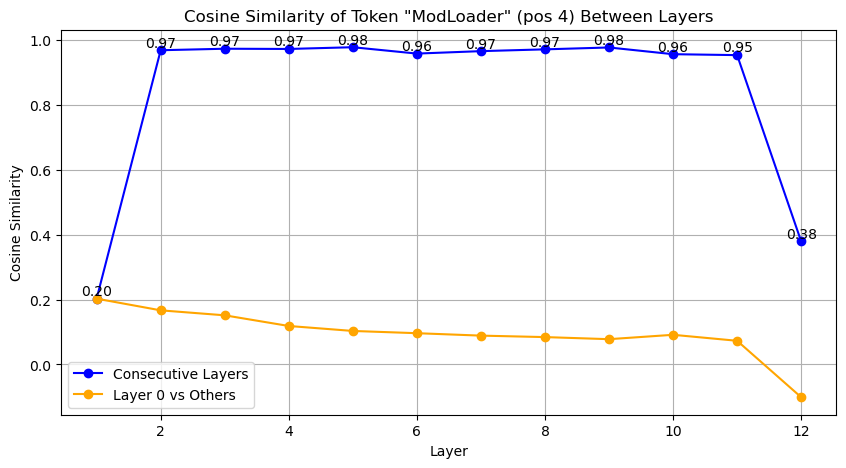

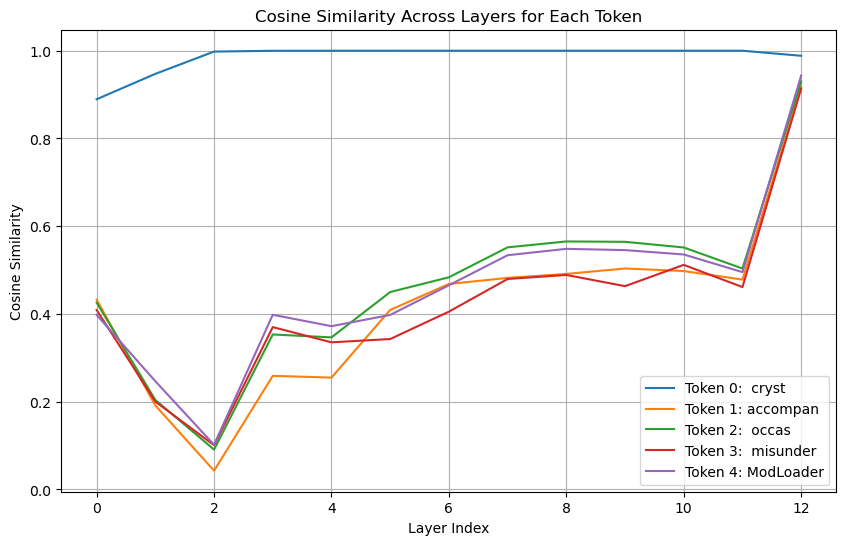

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 

The target token is: Ġcolor 

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 



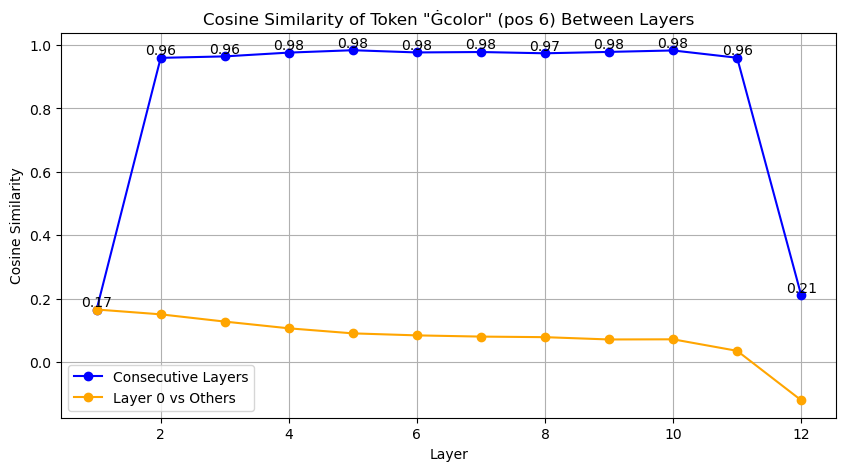


=== PC1 (explained var ratio: 0.983) ===
Dim  447 (wt +0.964): top→ [' a', ' and', '-', ',', ' the'], bottom→ ['���', ' guiActiveUn', 'cloneembedreportprint', '\x06', '\x1a']
Dim  138 (wt +0.264): top→ ['.', ' and', '-', ',', ' the'], bottom→ [' acknow', 'iscons', ' misunder', ' Azerb', 'BuyableInstoreAndOnline']
Dim  378 (wt -0.019): top→ ['EMA', 'mite', 'medi', 'pez', 'Express'], bottom→ ['utterstock', ' fragmented', 'ministic', '\\/', ' Gaw']

=== PC2 (explained var ratio: 0.005) ===
Dim  138 (wt +0.822): top→ ['.', ' and', '-', ',', ' the'], bottom→ [' acknow', 'iscons', ' misunder', ' Azerb', 'BuyableInstoreAndOnline']
Dim  481 (wt -0.329): top→ ['-', ' a', ' and', ',', ' the'], bottom→ ['覚醒', 'cloneembedreportprint', '龍契士', '�', '�']
Dim  373 (wt +0.259): top→ ['\x05', 'rawdownload', 'reportprint', '�', '\x7f'], bottom→ [' the', ',', ' and', '-', ' a']


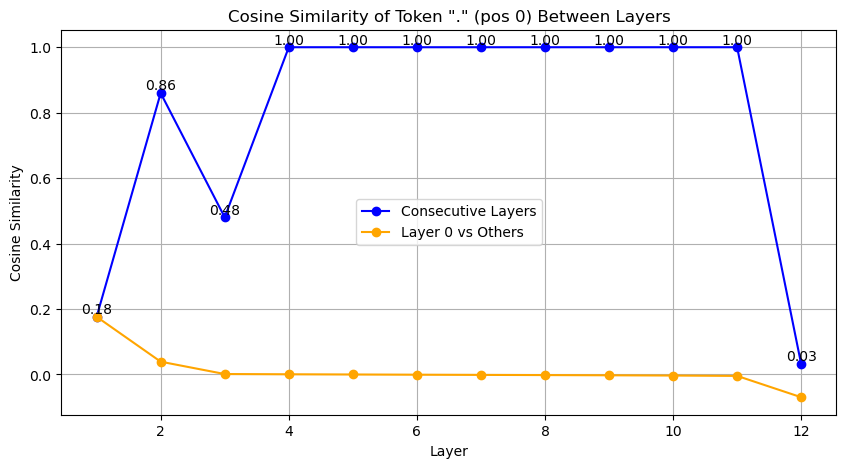

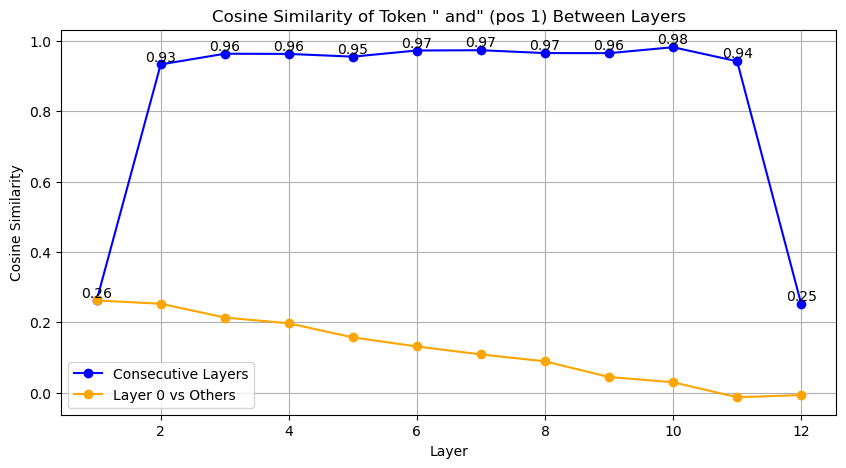

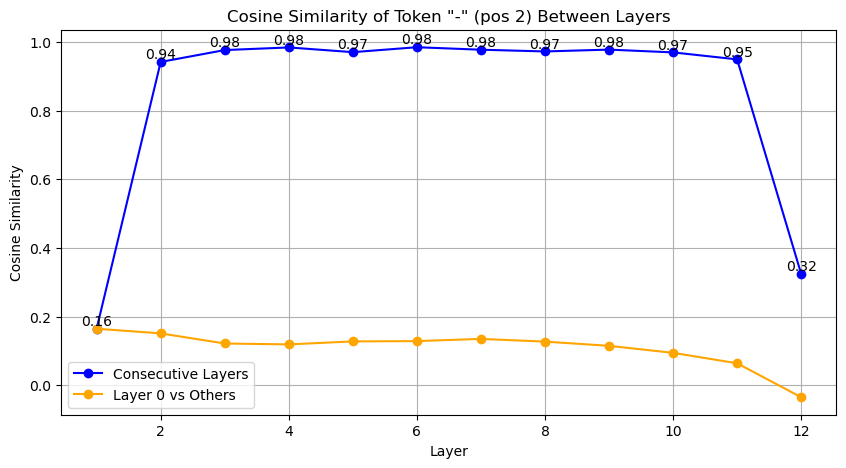

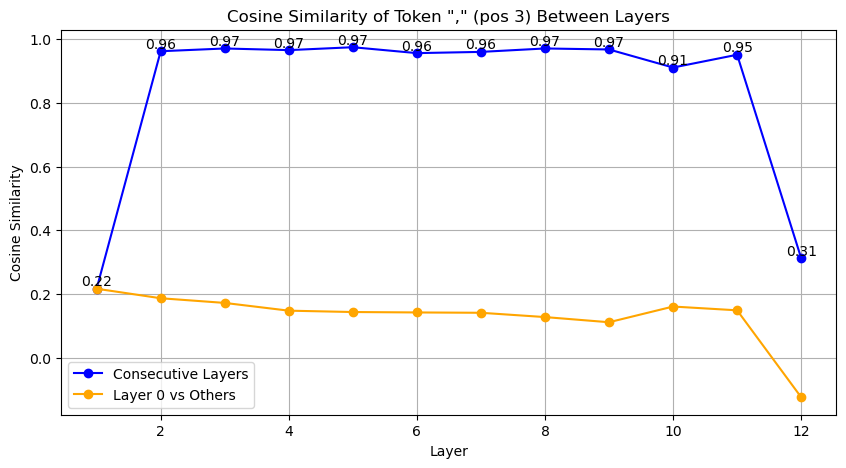

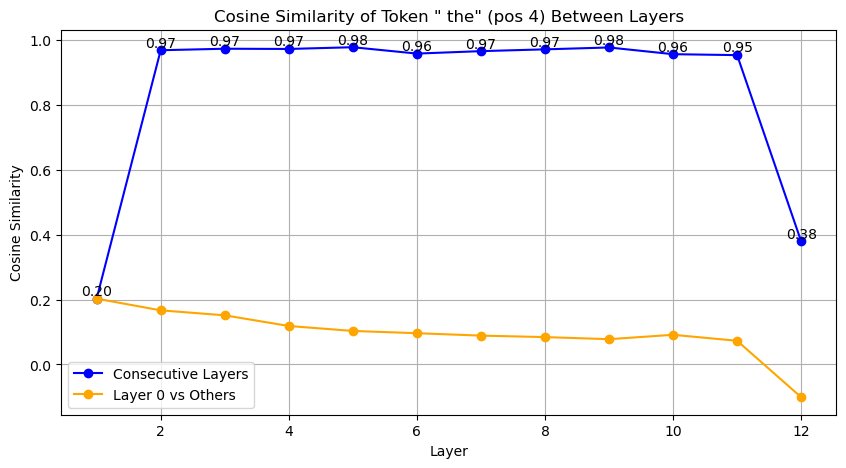

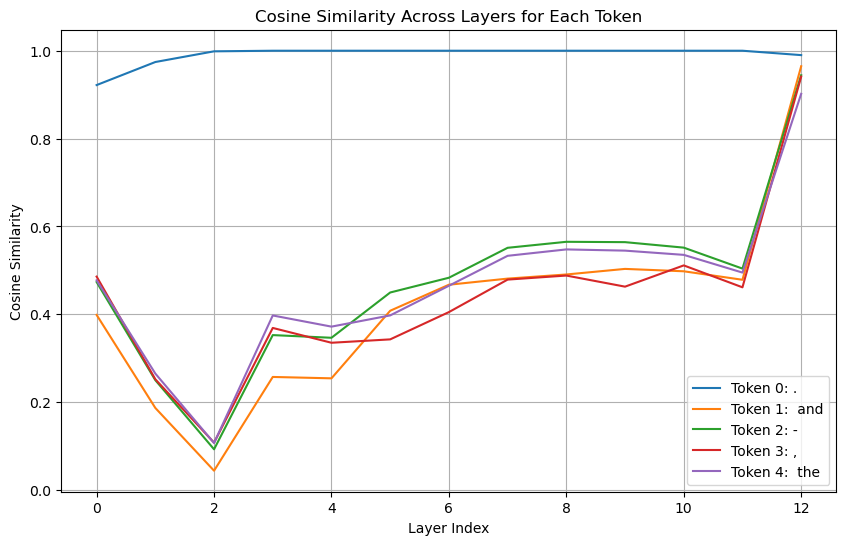

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 

The target token is: Ġand 

MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW 



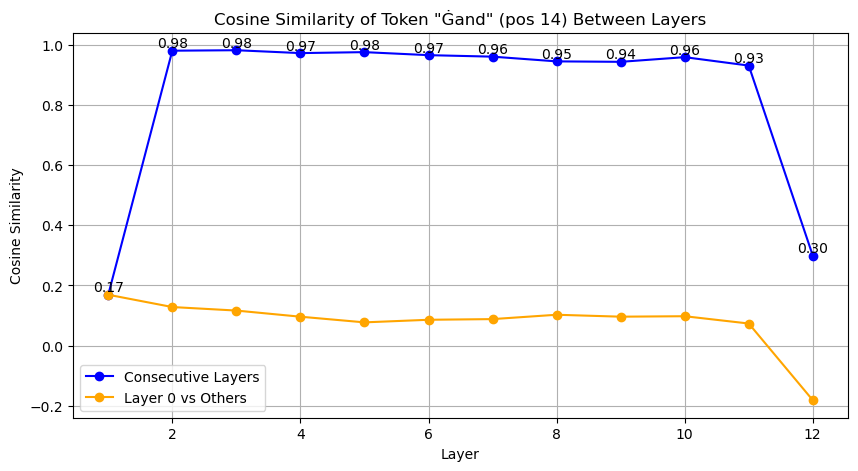


=== PC1 (explained var ratio: 0.983) ===
Dim  447 (wt +0.964): top→ [' a', ' and', '-', ',', ' the'], bottom→ ['���', ' guiActiveUn', 'cloneembedreportprint', '\x06', '\x1a']
Dim  138 (wt +0.264): top→ ['.', ' and', '-', ',', ' the'], bottom→ [' acknow', 'iscons', ' misunder', ' Azerb', 'BuyableInstoreAndOnline']
Dim  378 (wt -0.019): top→ ['EMA', 'mite', 'medi', 'pez', 'Express'], bottom→ ['utterstock', ' fragmented', 'ministic', '\\/', ' Gaw']

=== PC2 (explained var ratio: 0.005) ===
Dim  138 (wt +0.822): top→ ['.', ' and', '-', ',', ' the'], bottom→ [' acknow', 'iscons', ' misunder', ' Azerb', 'BuyableInstoreAndOnline']
Dim  481 (wt -0.329): top→ ['-', ' a', ' and', ',', ' the'], bottom→ ['覚醒', 'cloneembedreportprint', '龍契士', '�', '�']
Dim  373 (wt +0.259): top→ ['\x05', 'rawdownload', 'reportprint', '�', '\x7f'], bottom→ [' the', ',', ' and', '-', ' a']


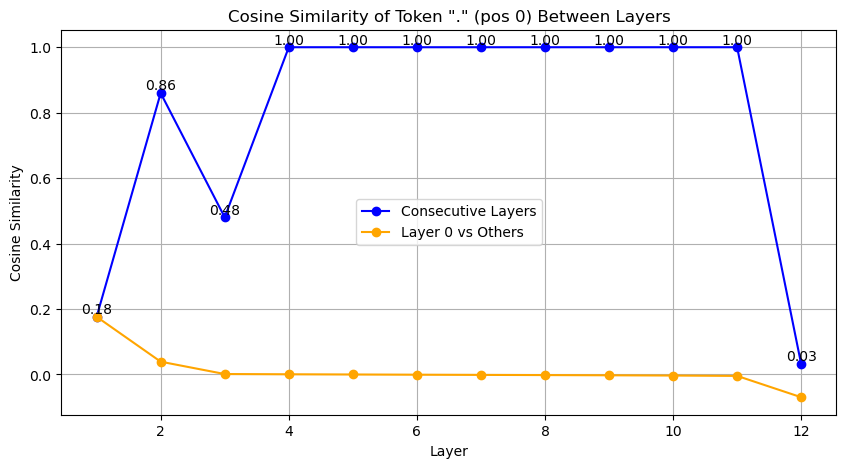

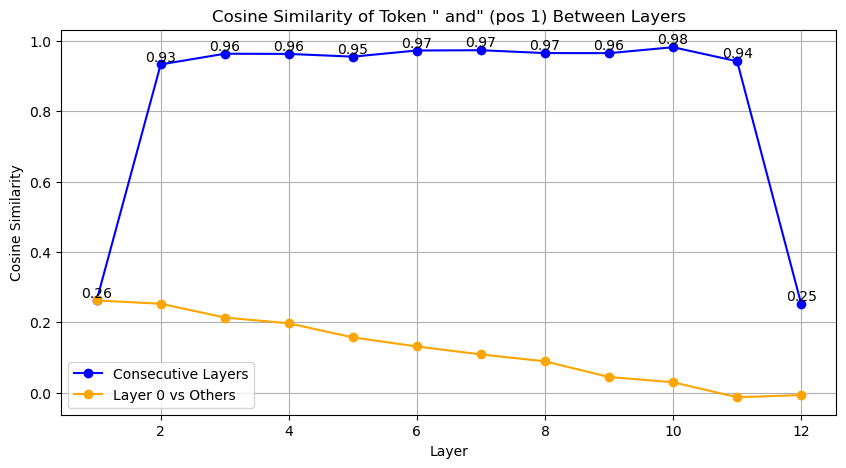

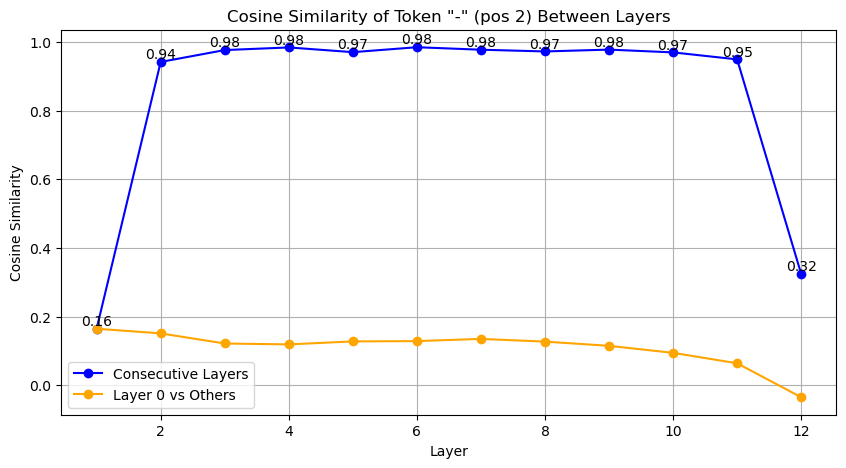

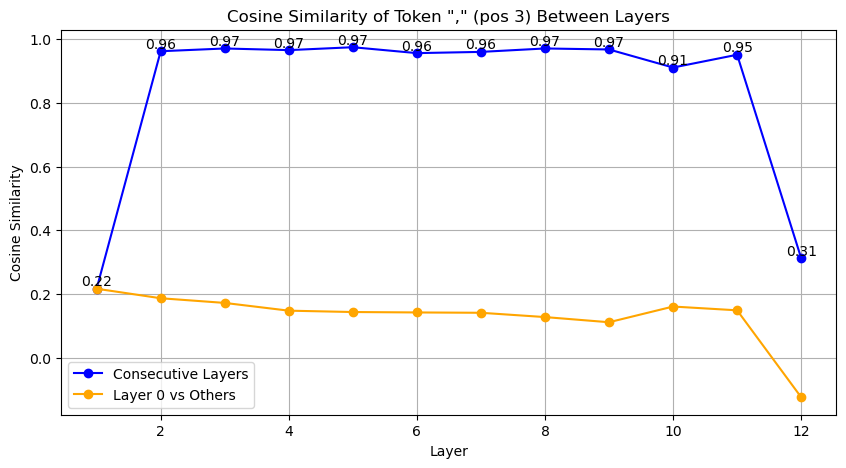

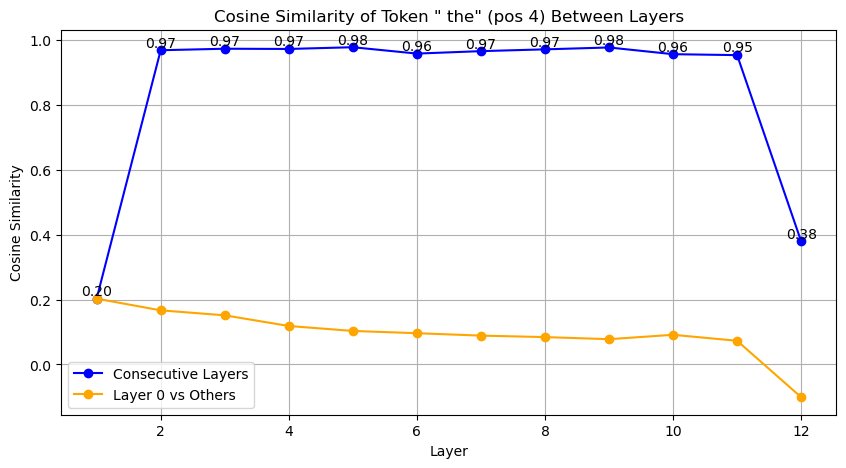

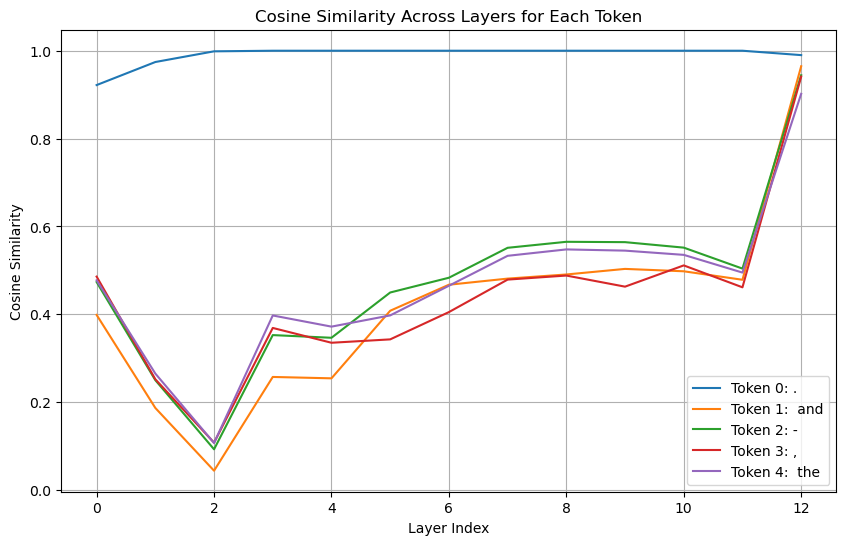

In [20]:
M = 3        # Number of dimensions for each PC
n_component = 2  # Number of principal components
X_static = model.get_input_embeddings().weight.detach().cpu().numpy()
vocab = [tokenizer.decode([i]) for i in range(len(tokenizer))]

targets =random.sample(generated_tokens, 3)

# Run PCA and get top dimensions
#top_dimensions_list_prompt = multiple_tokens(targets, tokens_prompt, hidden_state_prompt, X_static, vocab, M, n_component)

for idx, tar in enumerate(targets):
    print("MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW \n")
    print("The target token is:", tar,"\n")
    print("MWMWMWMWMWMWMWMWMWMWMWMMWMWMWMWMW \n")
    
    top_dimensions_list_generated, bottom_tokens_PC1,bottom_tokens_PC2, top_tokens_PC1, top_tokens_PC2 = multiple_tokens(tar,
                                                                                                                         generated_tokens, 
                                                                                                                         hidden_state_generated, 
                                                                                                                         X_static,
                                                                                                                         vocab, 
                                                                                                                         M,
                                                                                                                         n_component, 
                                                                                                                         norm_plot=False)
    
#    dimension_tracking(top_dimensions_list_generated, tar, generated_tokens, M)


   # cosine(top_tokens_PC1, hidden_state_generated)
    cosine(top_tokens_PC2, hidden_state_generated)

    #cosine(bottom_tokens_PC1, hidden_state_generated)
   # cosine(bottom_tokens_PC2, hidden_state_generated)



#eighenvalue/eighenvector to undestand how the low dimension in orienteded
#what it do? It shift 
#SVD of a matrix?

1. What Each Dimension Represents:
High Positive Values:
Indicate that the vector strongly points in the corresponding direction in the embedding space.
Negative Values:
Indicate that the vector points in the opposite direction in the embedding space.
Small or Zero Values:
Suggest that the dimension has minimal contribution or is orthogonal to the pointing vector.



This tells you which hidden dimensions are most "used" in a specific layer. The dimensions with the highest average absolute values are contributing the most (on average) to representing the final token of each prompt.

Batch size: 40


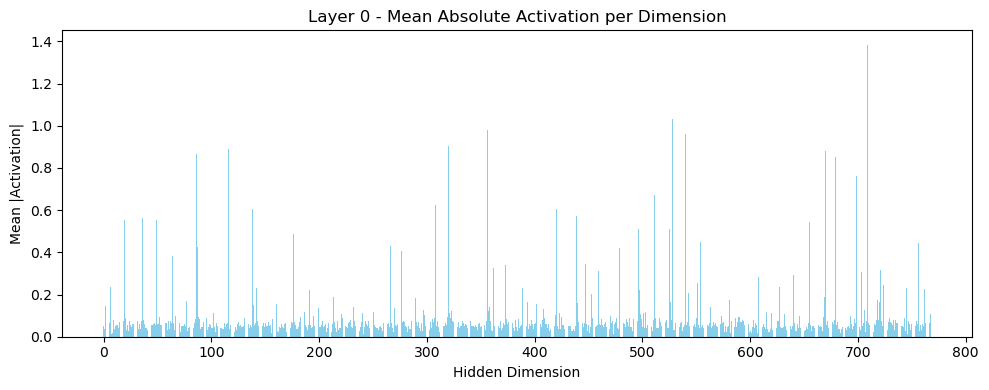

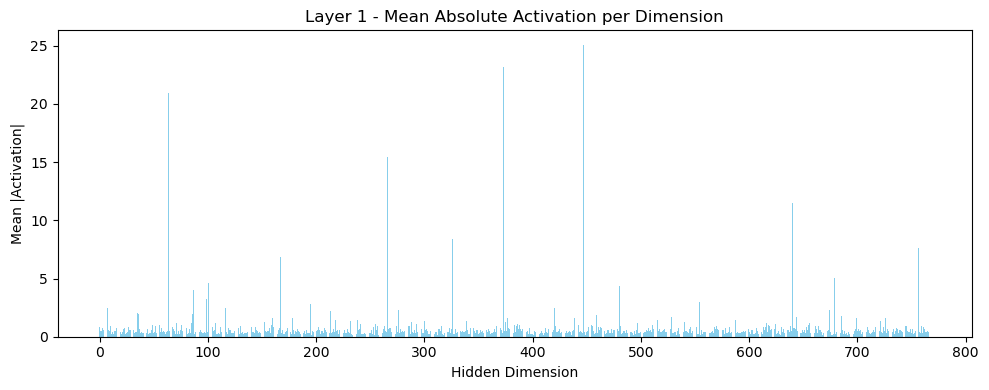

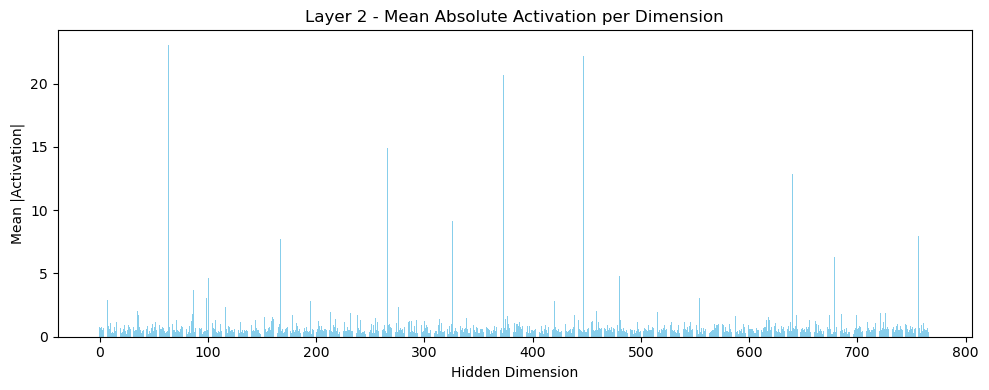

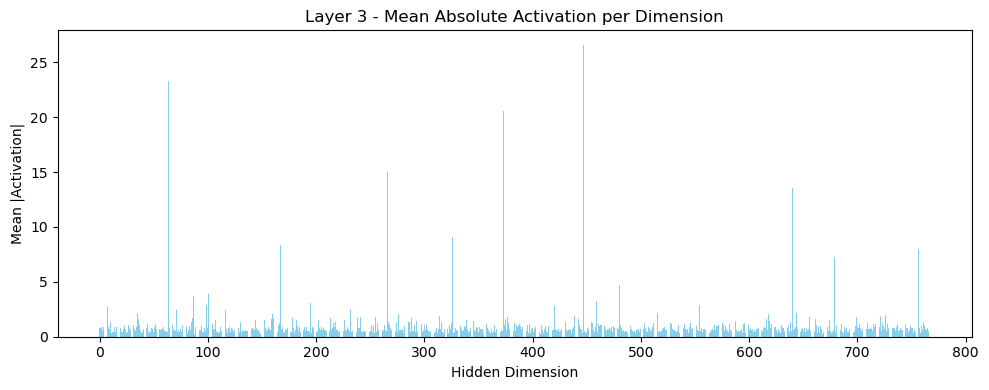

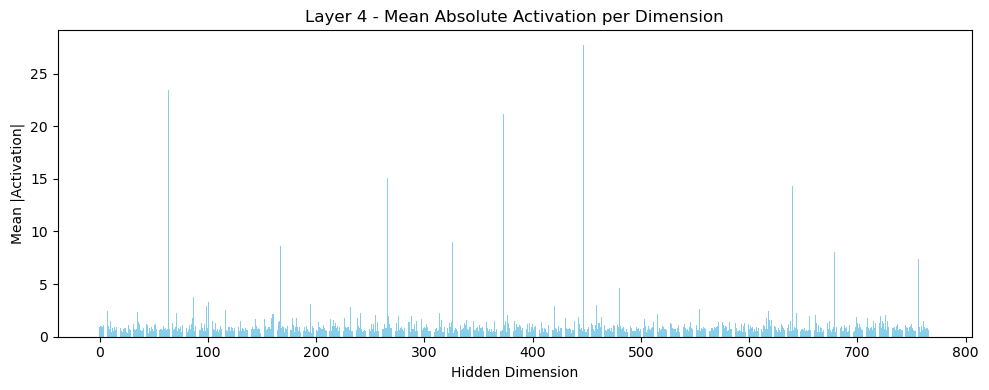

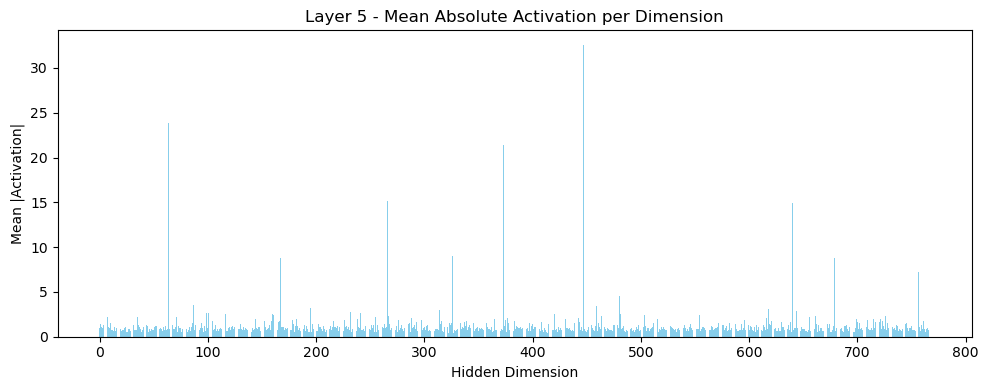

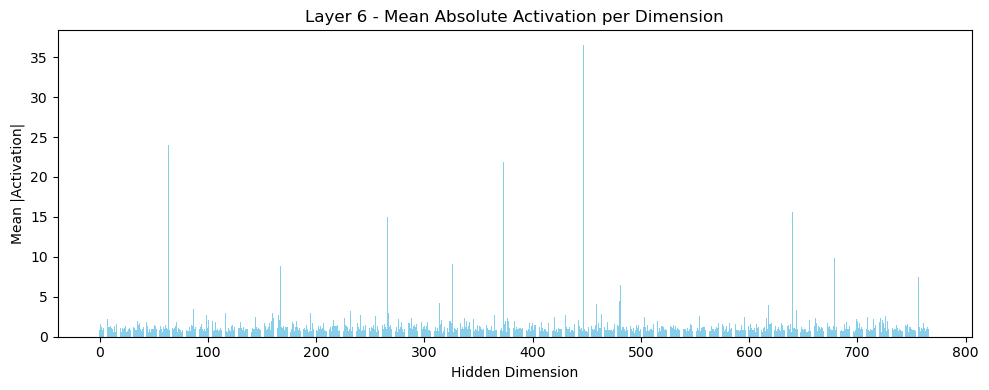

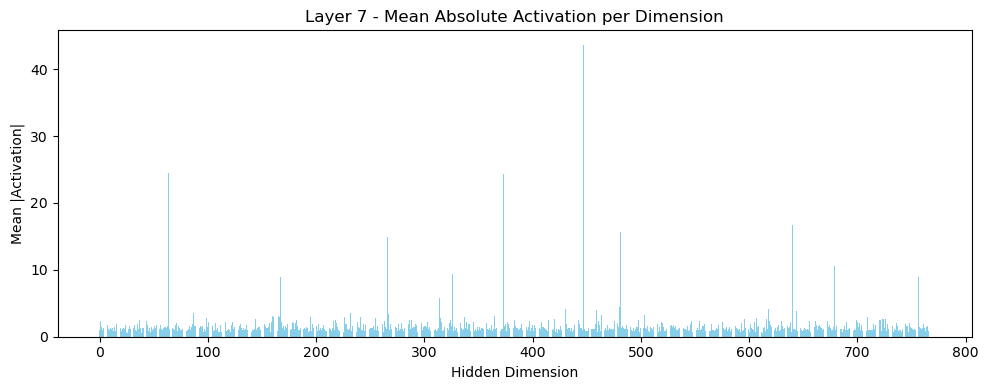

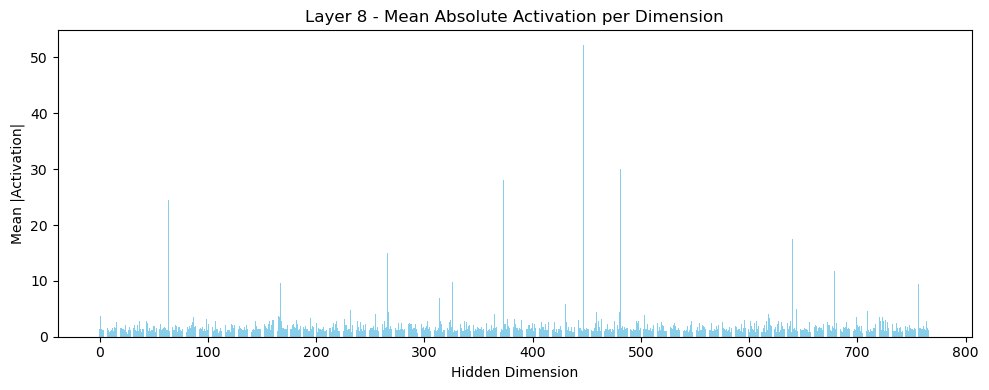

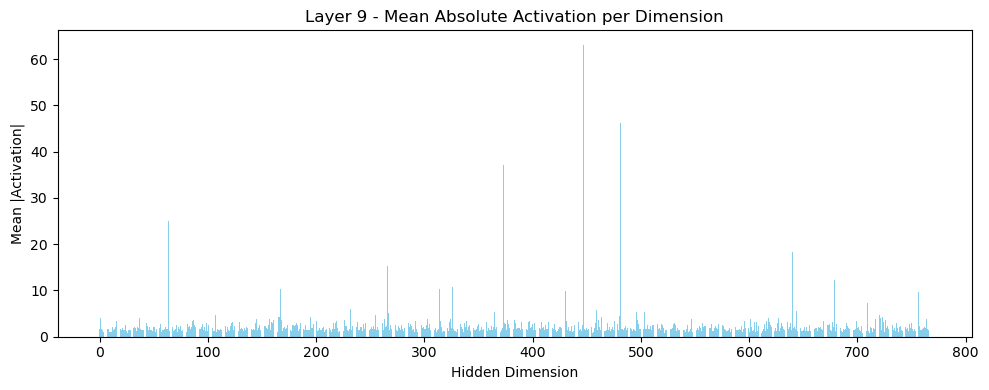

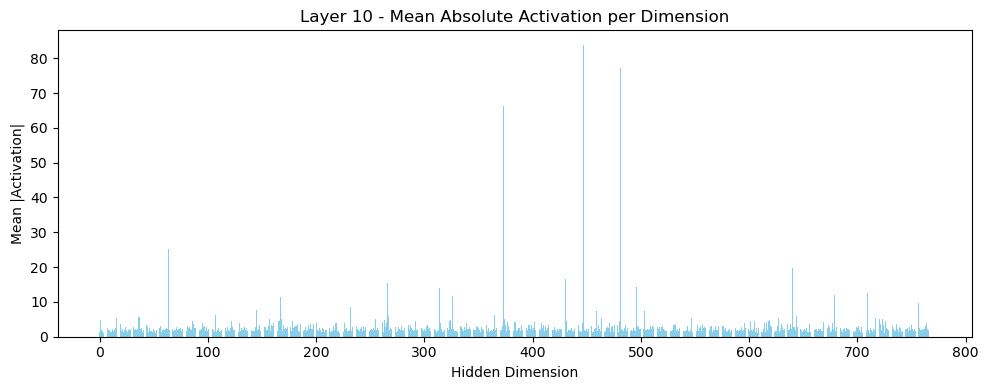

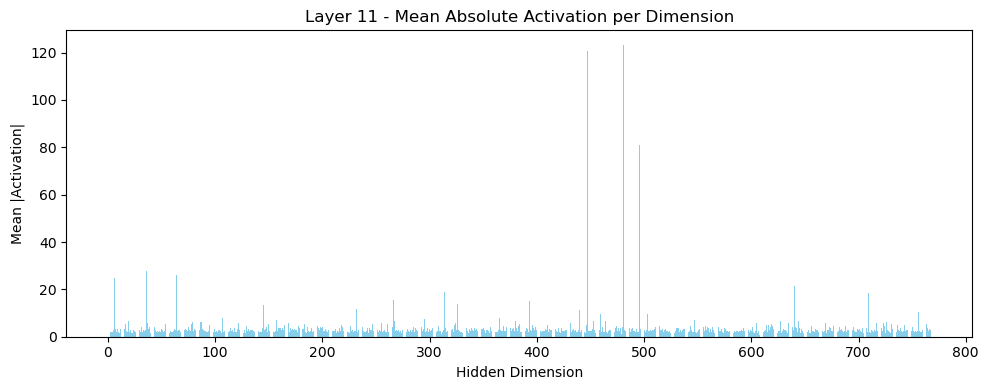

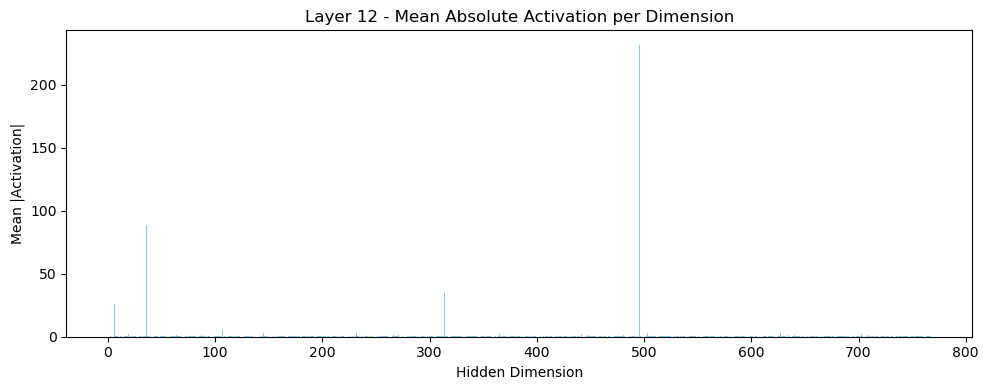

In [21]:
#ISTOGRAMMA DIMENSIONI PIù UTILIZZATE
gpt2_prompts = [
    "If you have five red balls and three blue balls, and you take two away, how many are left?",
    "Explain why the sky is blue in simple terms.",
    "What would happen if gravity on Earth suddenly doubled?",
    "Describe the differences between inductive and deductive reasoning.",
    "A train leaves New York at 60 mph...",
    "Write a short horror story set in a silent library.",
    "Invent a new mythological creature and describe its legend.",
    "Describe a utopian society in 100 words.",
    "Write a dialogue between a robot and a time traveler.",
    "Continue the story: “The last candle flickered, and then...”",
    "Rewrite the Gettysburg Address in modern slang.",
    "Make this tweet sound academic: \"Can’t even with this weather, lol.\"",
    "Turn a recipe into a Shakespearean poem.",
    "Rewrite a Wikipedia article as a fairy tale.",
    "Make a news headline sound like a movie trailer.",
    "Summarize the theme of “1984” in two paragraphs.",
    "Compare Hamlet and Macbeth as tragic heroes.",
    "Analyze the symbolism of the green light in The Great Gatsby.",
    "Describe Emily Dickinson’s writing style.",
    "Write a review of Mary Shelley’s Frankenstein as if it was published today.",
    "Write a Python function to calculate factorial recursively.",
    "Explain what a neural network is to a 10-year-old.",
    "What is the difference between TCP and UDP?",
    "Fix this broken code: `for i in range(10) print(i)`",
    "Write a regex that matches email addresses.",
    "Explain climate change and its main causes.",
    "Summarize the history of the Roman Empire in 5 bullet points.",
    "What are the pros and cons of nuclear energy?",
    "Describe the process of photosynthesis.",
    "What are the main economic consequences of inflation?",
    "What is quantum entanglement?",
    "Explain the theory of evolution by natural selection.",
    "What’s the difference between mitosis and meiosis?",
    "What would life be like on Mars?",
    "Describe the anatomy of the human heart.",
    "You’re in a room with two doors...",
    "Invent a new board game with simple rules.",
    "Generate a riddle that involves numbers and logic.",
    "Simulate a turn of Dungeons & Dragons (DM-style).",
    "Explain the strategy behind chess openings like the Sicilian Defense."
]


def histo(prompts):
    inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True)
    print(f"Batch size: {inputs['input_ids'].shape[0]}")

    with torch.no_grad():
        outputs = model(**inputs)

    hidden_states = outputs.hidden_states  # Tuple of tensors

    dim_layer=[]
    for i, layer_hidden in enumerate(hidden_states):
        # Shape: (batch_size, seq_len, hidden_dim)
        
        # Choose last token for each sample (you could also do mean across all tokens if preferred)
        last_token_indices = (inputs['attention_mask'].sum(dim=1) - 1).unsqueeze(1).unsqueeze(2)
        last_token_indices = last_token_indices.expand(-1, 1, layer_hidden.size(-1))  # Shape: (batch, 1, hidden_dim)
        last_token_embeddings = torch.gather(layer_hidden, dim=1, index=last_token_indices).squeeze(1)  # (batch, hidden_dim)

        # Compute mean absolute activation per dimension across all samples in the batch
        mean_activations = last_token_embeddings.abs().mean(dim=0).cpu().numpy()
        dim_layer.append(mean_activations)
        # Plot histogram
        plt.figure(figsize=(10, 4))
        plt.bar(np.arange(len(mean_activations)), mean_activations, color="skyblue")
        plt.title(f"Layer {i} - Mean Absolute Activation per Dimension")
        plt.xlabel("Hidden Dimension")
        plt.ylabel("Mean |Activation|")
        plt.tight_layout()
       # plt.show()

    return  dim_layer

mean_activations = histo(gpt2_prompts)


In [22]:
top_indices = np.argsort(mean_activations[12])[-5:][::-1]
print(top_indices)

for idx in top_indices:
    token = vocab[idx]

    print(f"Dimension: {idx}, Token: {token}")   #, Mean Activation: {mean_activations[12][idx]}")


[496 430  36 314   6]
Dimension: 496, Token: age
Dimension: 430, Token: ra
Dimension: 36, Token: E
Dimension: 314, Token:  I
Dimension: 6, Token: '


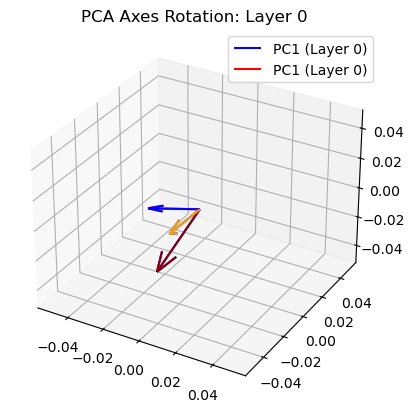

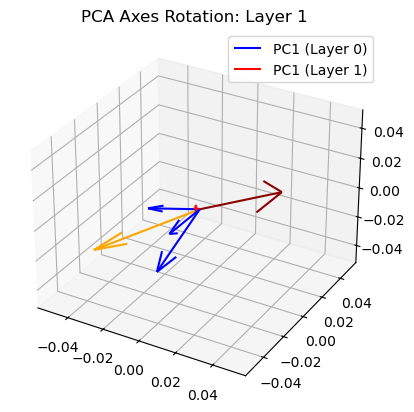

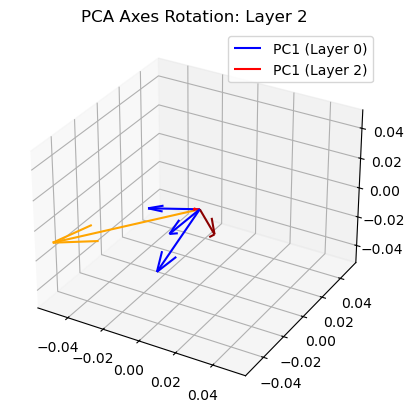

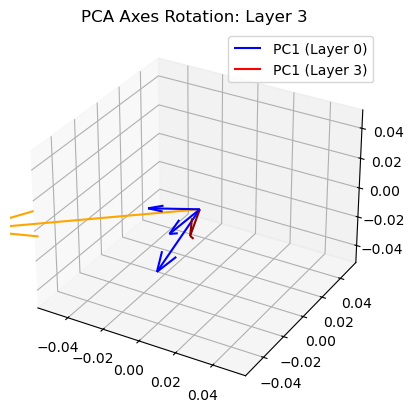

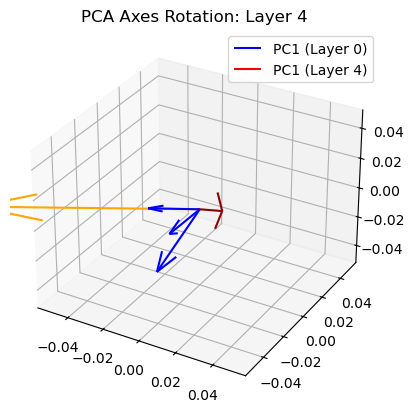

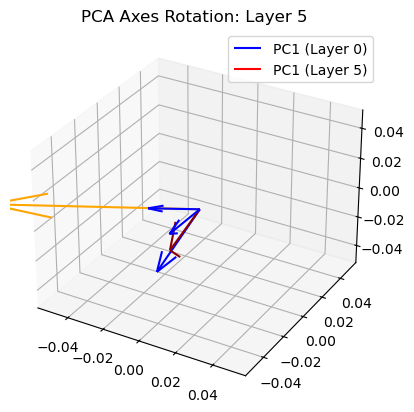

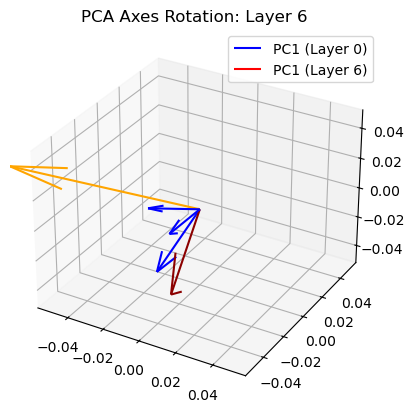

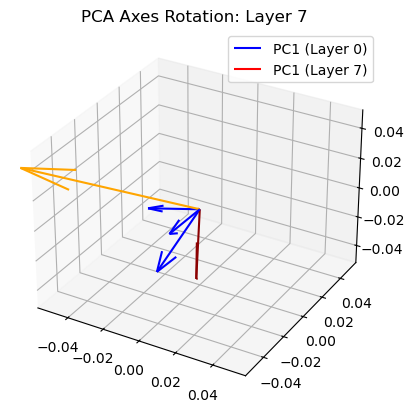

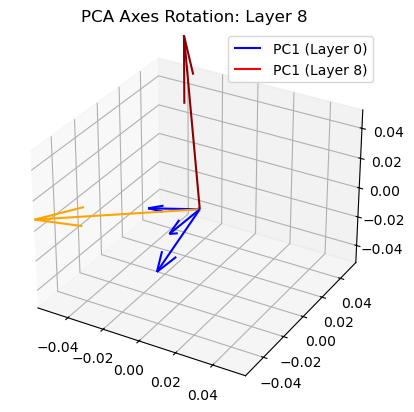

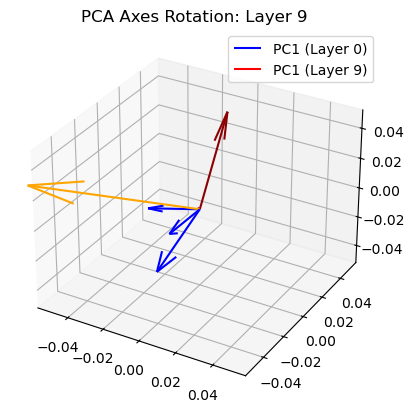

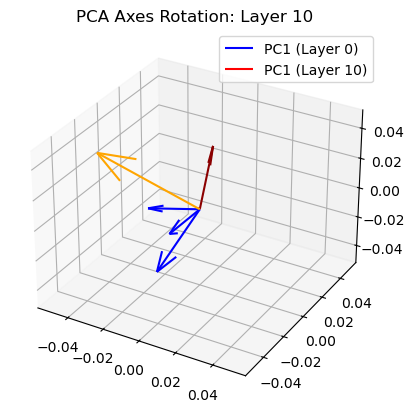

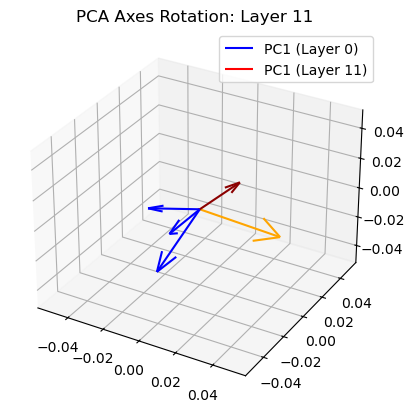

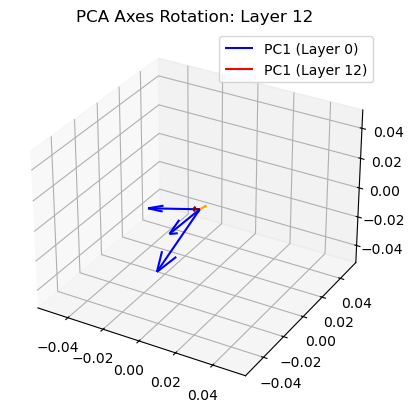

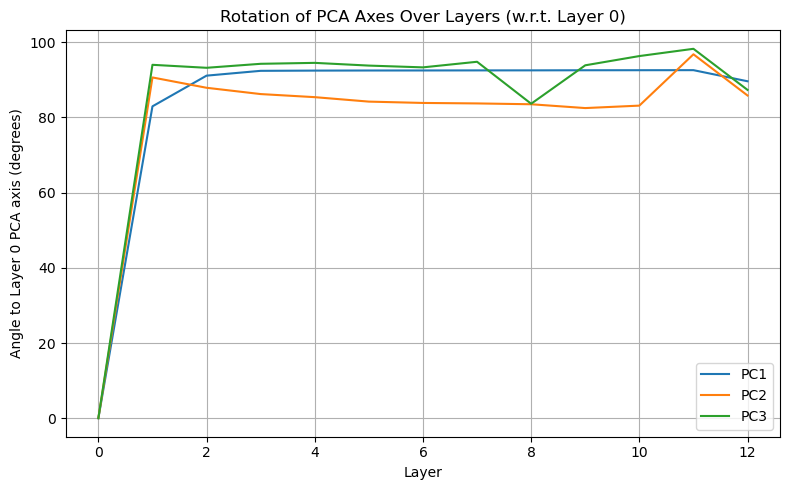

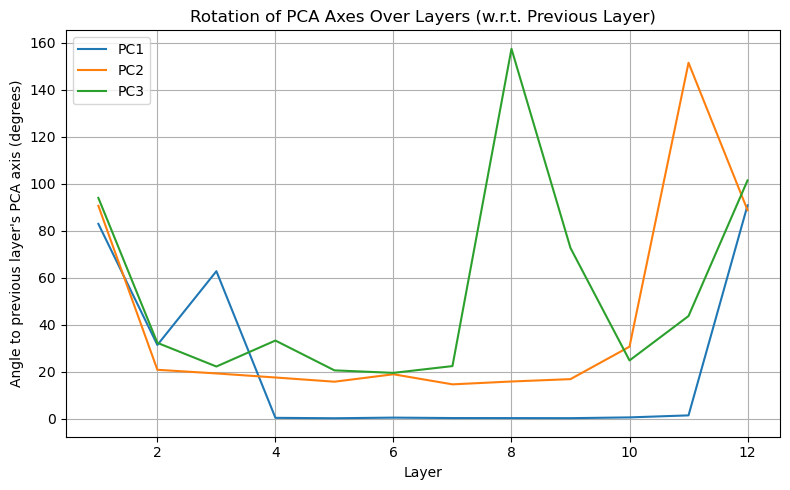

In [23]:
import os
import tempfile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.decomposition import PCA
import imageio

def plot_rotation_vectors(pca0, pcaN, c, save_path=None):

    colors0 = ['blue', 'blue', 'blue']  # Layer 0 colors for PC1, PC2, PC3
    colorsN = ['red', 'orange', 'darkred']   # Layer N colors for PC1, PC2, PC3
    vector_length = 1.5 

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(3):
        u = pca0.components_[i]
        v = pcaN.components_[i]


                # Normalize vectors
        u = u / np.linalg.norm(u)
        v = v / np.linalg.norm(v)

        ax.quiver(0, 0, 0, u[0]*vector_length, u[1]*vector_length, u[2]*vector_length, 
                  color=colors0[i], label=f'PC{i+1} (Layer 0)' if i == 0 else "")
        ax.quiver(0, 0, 0, v[0]*vector_length, v[1]*vector_length, v[2]*vector_length, 
                  color=colorsN[i], label=f'PC{i+1} (Layer {c})' if i == 0 else "")


    ax.set_title(f"PCA Axes Rotation: Layer {c}")
    ax.legend()

    if save_path is not None:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def axis_PCA_to_gif(hidden_states, gif_path="pca_rotation.gif"):
    layer0 = hidden_states[0][0]  # shape: (seq_len, hidden_dim)
    pca0 = PCA(n_components=3)
    pca0.fit(layer0.detach().numpy())

    # Save frames in temporary directory
    temp_dir = tempfile.mkdtemp()
    image_paths = []

    for i, layer in enumerate(hidden_states):
        reps = layer[0].detach().numpy()
        pcaN = PCA(n_components=3)
        pcaN.fit(reps)

        image_file = os.path.join(temp_dir, f"frame_{i:02d}.png")
        plot_rotation_vectors(pca0, pcaN, i, image_file)
        image_paths.append(image_file)

    # Create GIF from frames
    images = [imageio.imread(img) for img in image_paths]
    imageio.mimsave(gif_path, images, duration=3.5)



def angles_between_pca_bases(pca0, pcaN, k=3):
    angles = []
    for i in range(k):
        v1 = pca0.components_[i]
        v2 = pcaN.components_[i]
        dot = np.dot(v1, v2)
        dot = np.clip(dot, -1.0, 1.0)
        angle_deg = np.arccos(dot) * 180 / np.pi
        angles.append(angle_deg)
    return angles


def axis_PCA(hidden_states):
    layer0 = hidden_states[0][0]  # shape: (seq_len, hidden_dim)
    pca0 = PCA(n_components=3)
    pca0.fit(layer0.detach().numpy())

    all_angles = []   # Angles to Layer 0
    all_angles_c = [] # Angles to previous Layer (N-1)
    pcaN_1 = None

    for i, layer in enumerate(hidden_states):
        reps = layer[0].detach().numpy()
        pcaN = PCA(n_components=3)
        pcaN.fit(reps)

        angles = angles_between_pca_bases(pca0, pcaN, k=3)
        all_angles.append(angles)

        if pcaN_1 is not None:
            angles_c = angles_between_pca_bases(pcaN_1, pcaN, k=3)
            all_angles_c.append(angles_c)

        pcaN_1 = pcaN

        plot_rotation_vectors(pca0, pcaN, i)

    all_angles = np.array(all_angles)
    all_angles_c = np.array(all_angles_c)
    layers = np.arange(len(hidden_states))

    # Plot angles to Layer 0
    plt.figure(figsize=(8, 5))
    for i in range(3):
        plt.plot(layers, all_angles[:, i], label=f'PC{i+1}')
    plt.xlabel("Layer")
    plt.ylabel("Angle to Layer 0 PCA axis (degrees)")
    plt.title("Rotation of PCA Axes Over Layers (w.r.t. Layer 0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot angles to previous Layer (N-1)
    plt.figure(figsize=(8, 5))
    # all_angles_c shape: (num_layers-1, 3), layers[1:] matches
    for i in range(3):
        plt.plot(layers[1:], all_angles_c[:, i], label=f'PC{i+1}')
    plt.xlabel("Layer")
    plt.ylabel("Angle to previous layer's PCA axis (degrees)")
    plt.title("Rotation of PCA Axes Over Layers (w.r.t. Previous Layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    


axis_PCA(hidden_state_generated)


#IF U WANT SAVE PLOT AS A gif un mute this
#axis_PCA_to_gif(hidden_state_generated)